Dry Bean Dataset
In given dataset there are 7 kinds of beans present we have to predict type of dry bean based on different conditions.

These is a Multiclass Classification Problem. Based on Area, Perimeter, Calories,etc we have to predict the class of dry beans.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Data
df = pd.read_excel("C:\\Users\\endiemn\\Downloads\\Dry_Bean_Dataset.xlsx")

In [3]:
# Extracting first five rows 
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Shape of dataset
df.shape

(13611, 17)

In [5]:
# Extracting column names
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [6]:
# Check Null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
# Check the duplicate values in the dataset
df.duplicated().sum()

68

In [8]:
# Delete the duplicate rows
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(13543, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [12]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

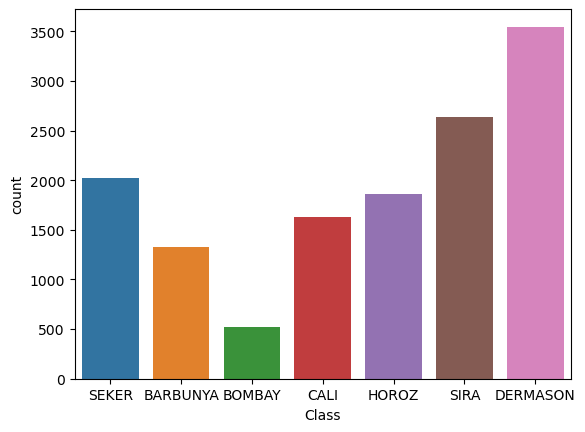

In [13]:
sns.countplot(df['Class'])

<AxesSubplot:>

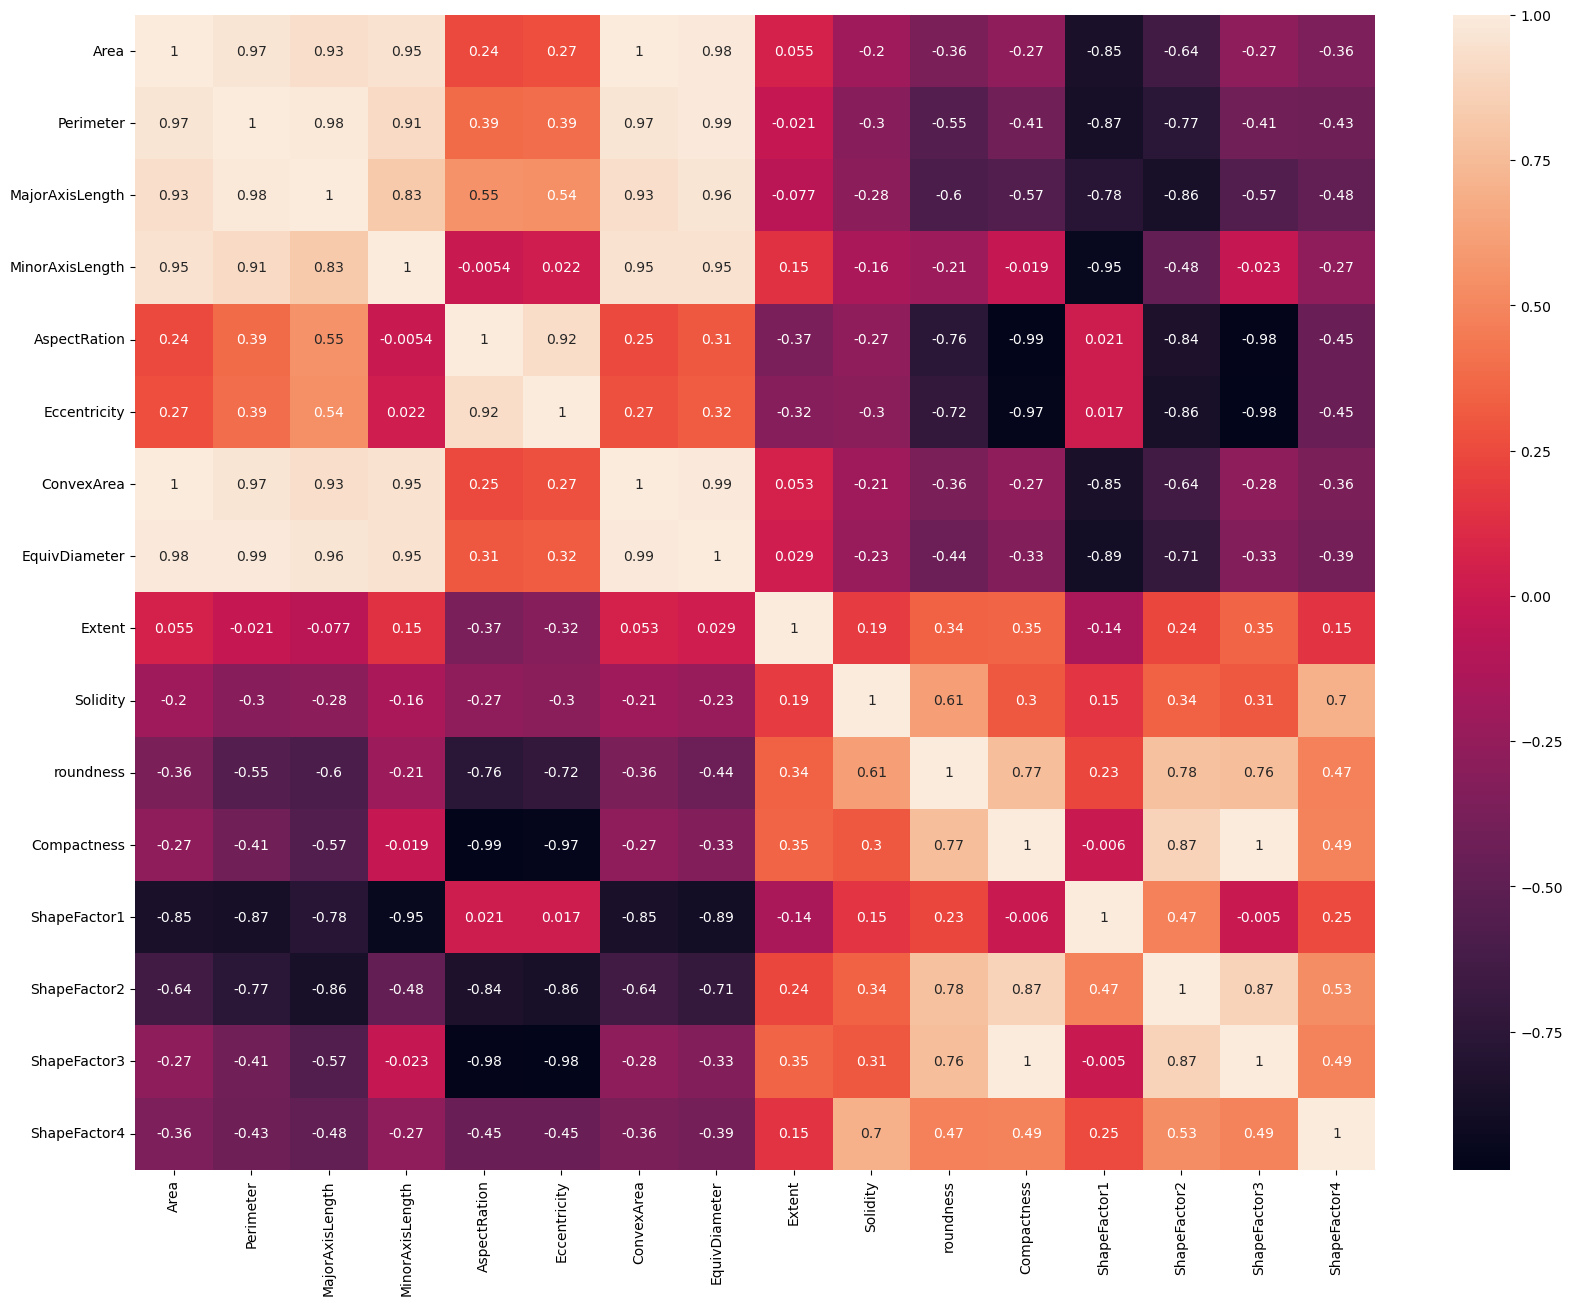

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [15]:
#Converting Class into numeric variable
df['class']=pd.factorize(df['Class'])[0]
df.drop(['Class'],axis=1,inplace=True)

In [16]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


In [17]:
df['class'].value_counts()

6    3546
5    2636
0    2027
4    1860
3    1630
1    1322
2     522
Name: class, dtype: int64

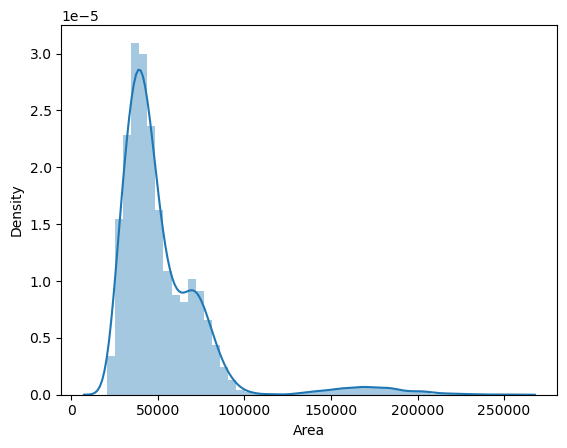

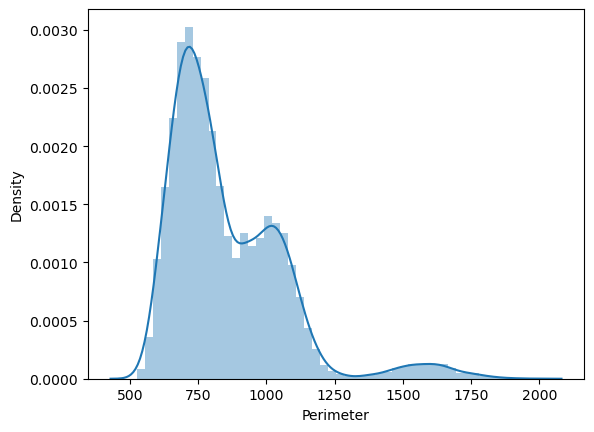

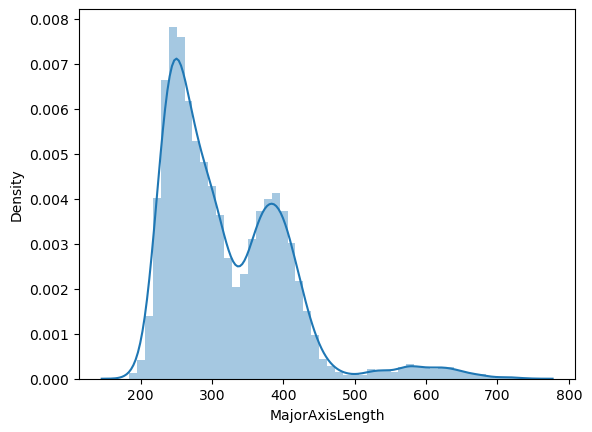

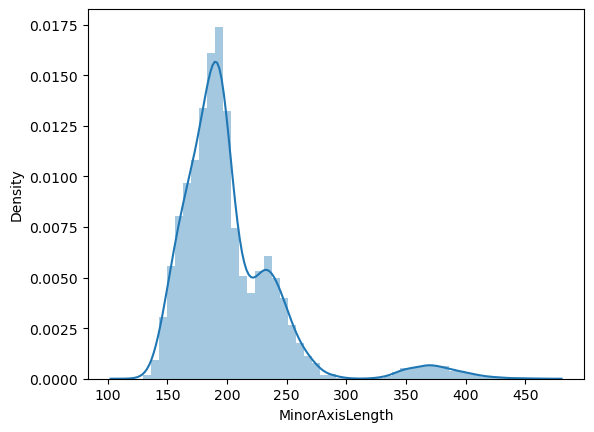

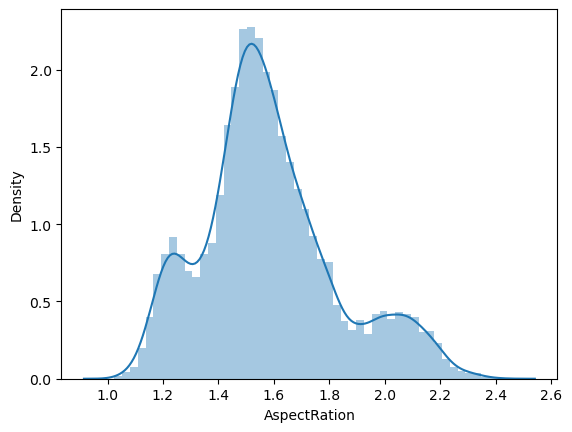

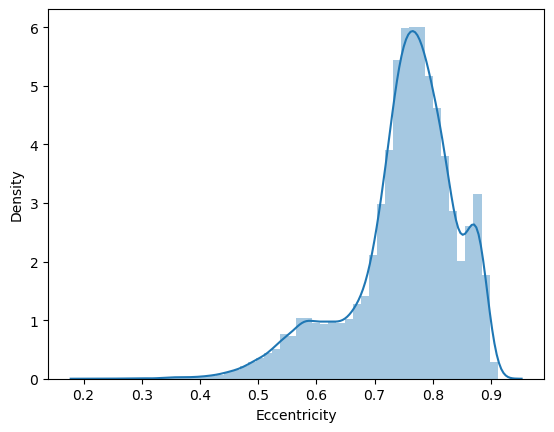

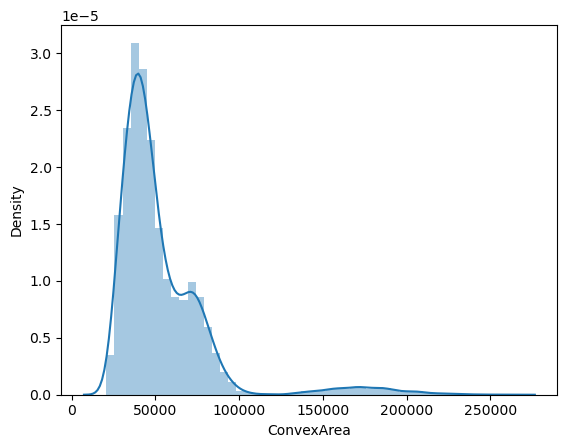

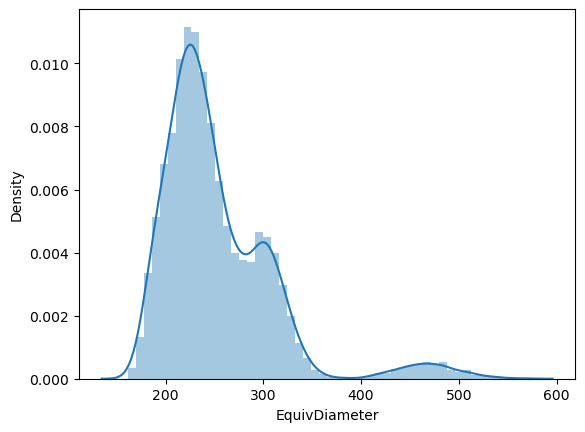

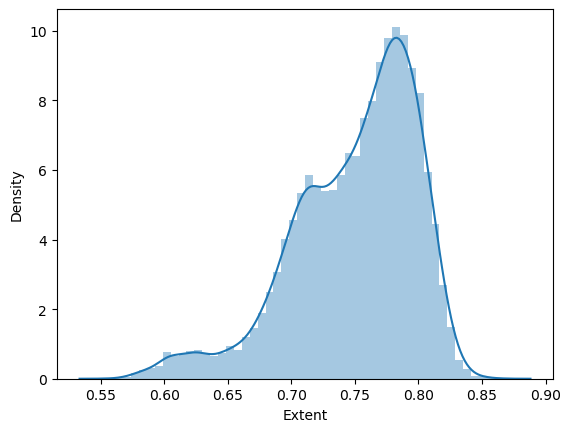

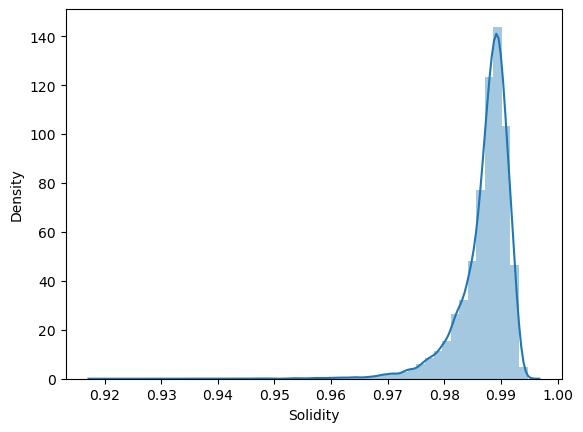

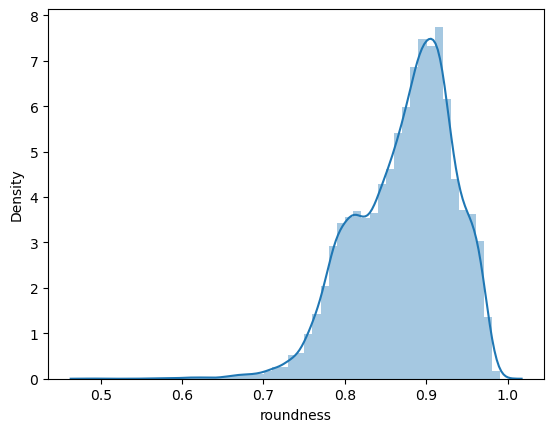

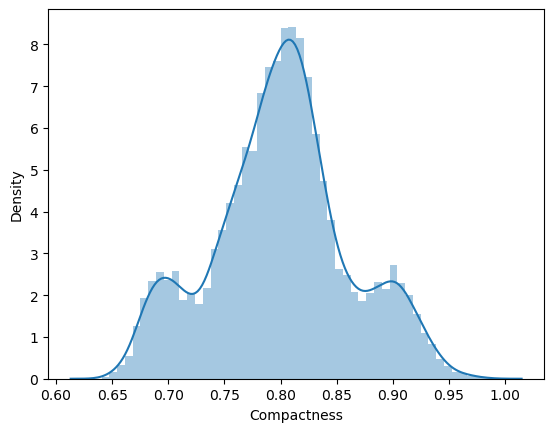

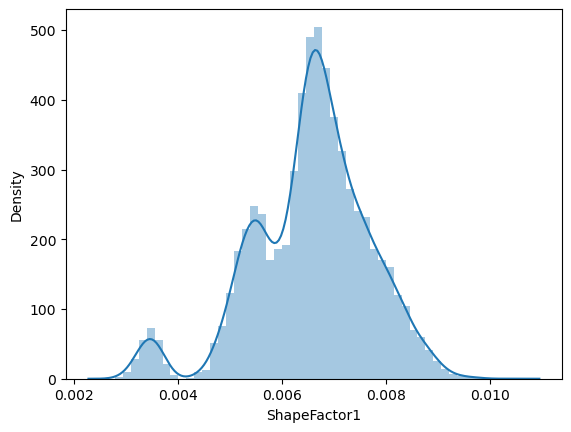

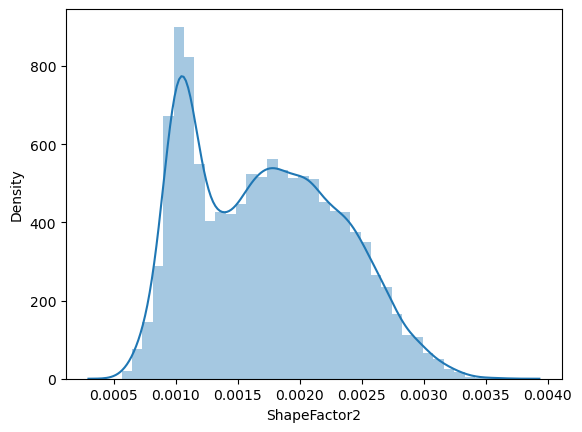

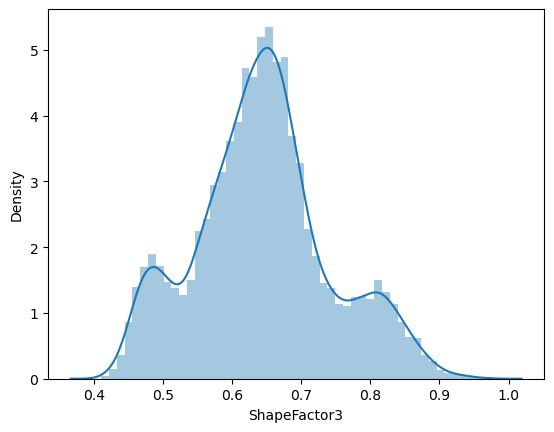

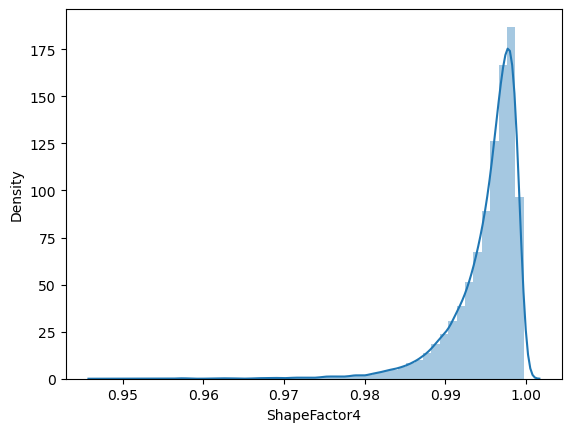

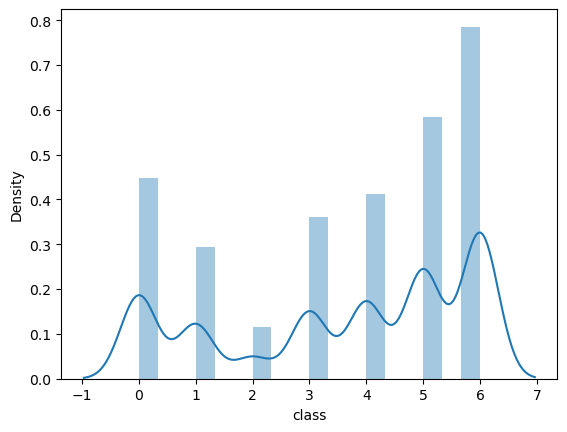

In [18]:
#Distribution of all the variables
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

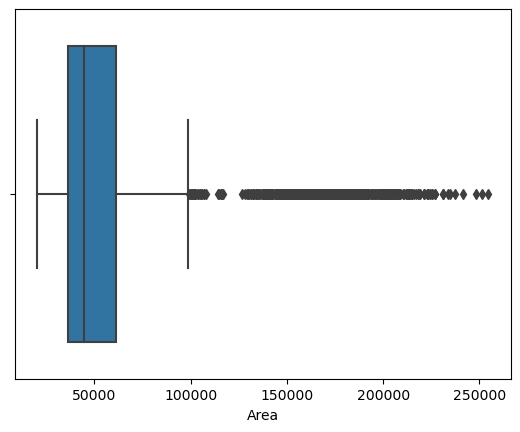

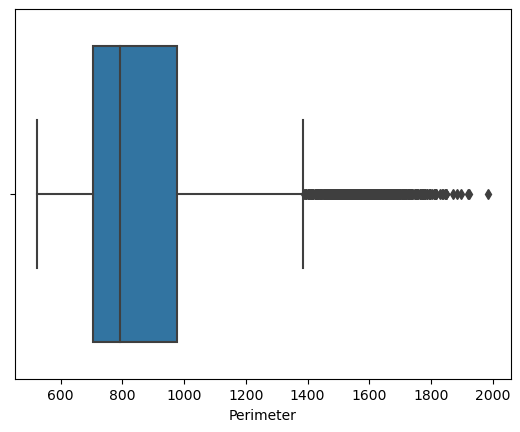

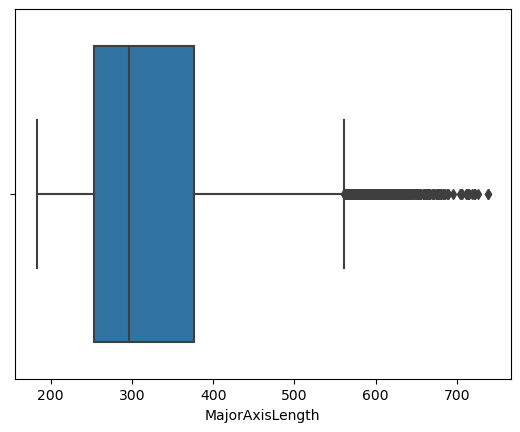

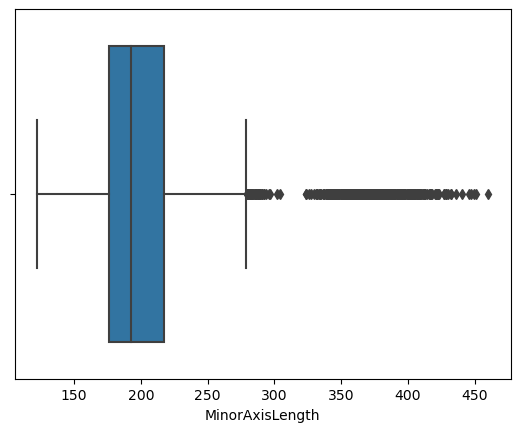

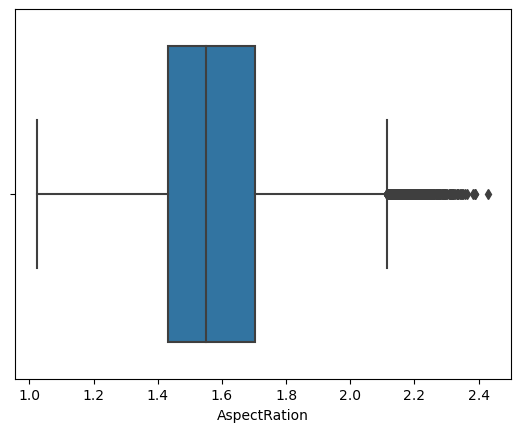

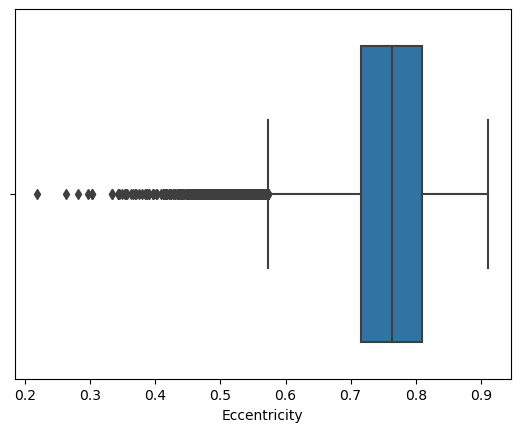

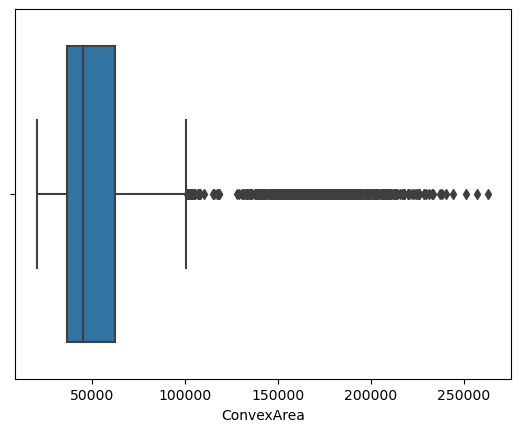

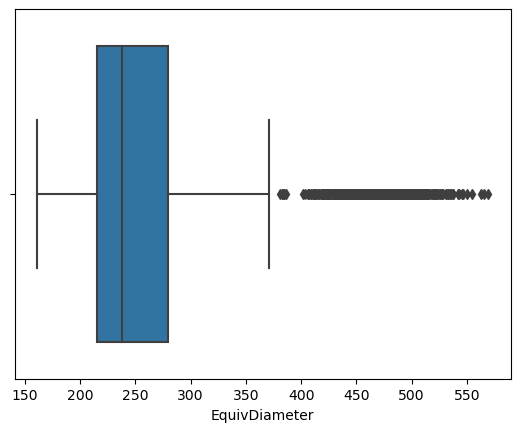

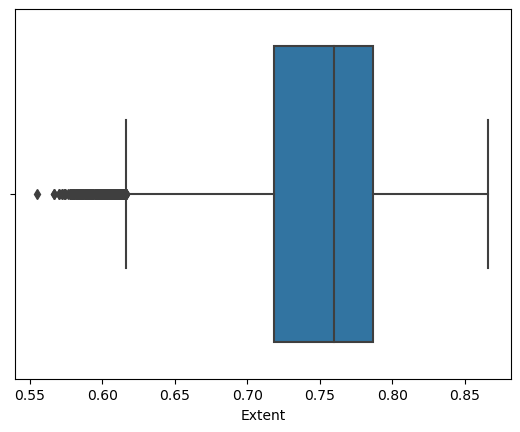

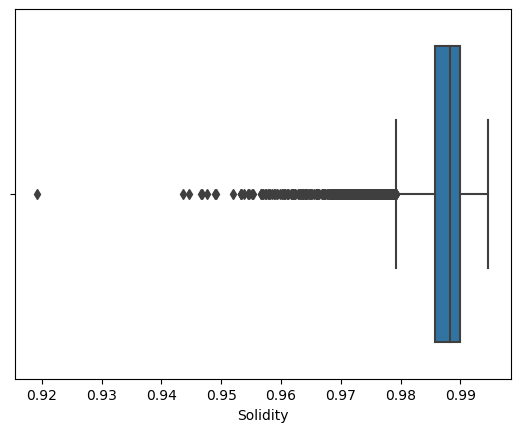

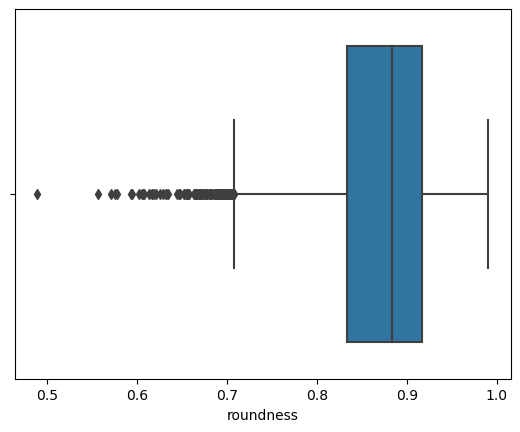

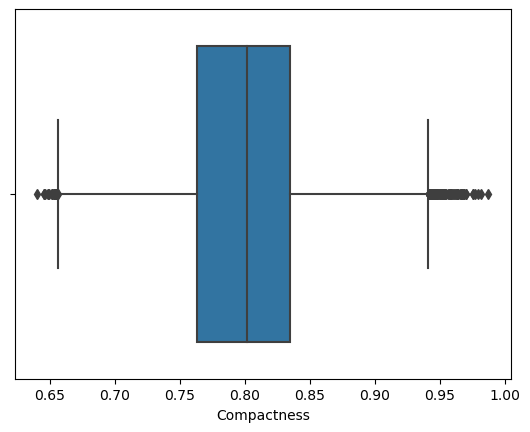

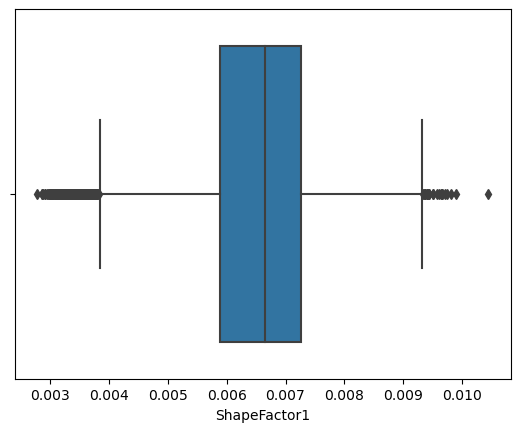

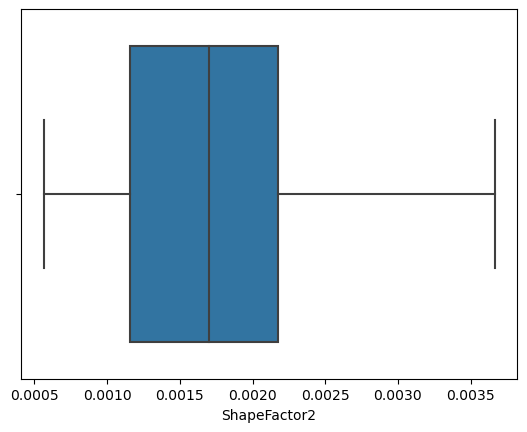

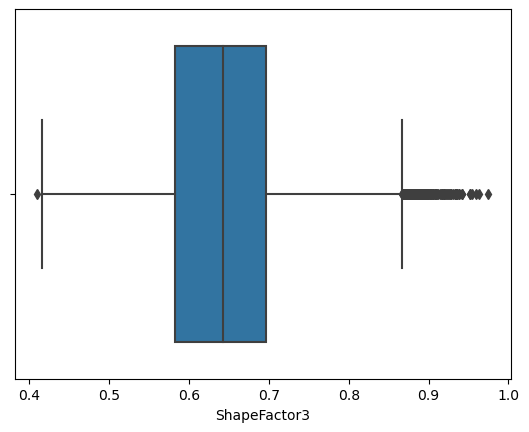

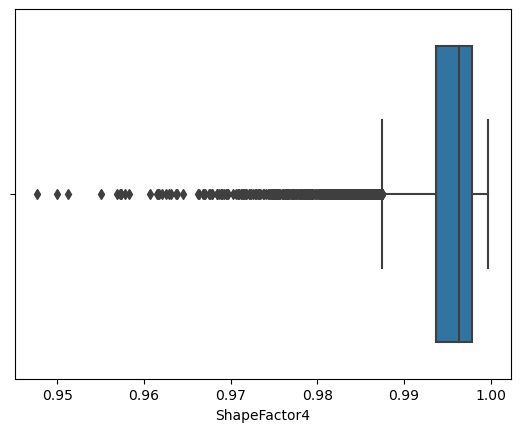

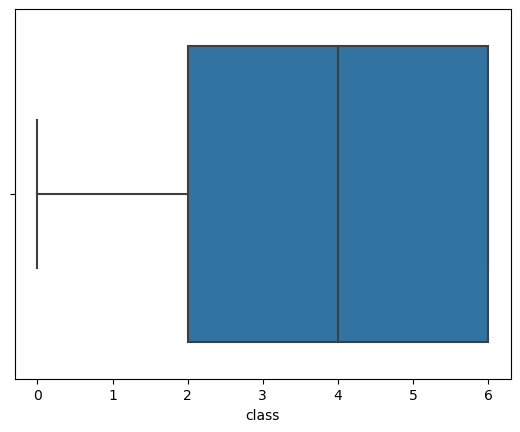

In [19]:
#Outlier Detection
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [20]:
#Outlier Treatment
for i in df.columns:
    Q1=np.quantile(df[i],0.25)
    Q2=np.quantile(df[i],0.50)
    Q3=np.quantile(df[i],0.75)
    Q4=np.quantile(df[i],1.0)
    IQR=Q3-Q1
    print("IQR=",IQR)
    Lower_Fence=Q1-(1.5*IQR)
    Upper_Fence=Q3+(1.5*IQR)
    print("Lower_Fence=", i +" = "+ str(Lower_Fence) )
    print("Upper_Fence=", i +" = "+ str(Upper_Fence) )
    print()

IQR= 25099.5
Lower_Fence= Area = -1366.75
Upper_Fence= Area = 99031.25

IQR= 273.91650000000004
Lower_Fence= Perimeter = 292.35524999999996
Upper_Fence= Perimeter = 1388.0212500000002

IQR= 123.2256824204625
Lower_Fence= MajorAxisLength = 68.24828273067922
Upper_Fence= MajorAxisLength = 561.1510124125293

IQR= 41.35904641301249
Lower_Fence= MinorAxisLength = 113.84778744577926
Upper_Fence= MinorAxisLength = 279.28397309782923

IQR= 0.27325420475555995
Lower_Fence= AspectRation = 1.020780277676745
Upper_Fence= AspectRation = 2.1137970966989847

IQR= 0.09452757866267802
Lower_Fence= Eccentricity = 0.5733524682314974
Upper_Fence= Eccentricity = 0.9514627828822095

IQR= 25687.0
Lower_Fence= ConvexArea = -1857.5
Upper_Fence= ConvexArea = 100890.5

IQR= 64.62707346184601
Lower_Fence= EquivDiameter = 117.99266690549351
Upper_Fence= EquivDiameter = 376.5009607528775

IQR= 0.06811365474604347
Lower_Fence= Extent = 0.6165646627040458
Upper_Fence= Extent = 0.8890192816882196

IQR= 0.0043404547905

In [21]:
Data =df.copy()

In [22]:
Data['Area']=np.where(Data['Area']>99031.25,99031.25,
                         np.where(Data['Area']<-1366.75,-1366.75,Data['Area']))

In [23]:
Data['Perimeter']=np.where(Data['Perimeter']>1388.0212500000002,1388.0212500000002,
                         np.where(Data['Perimeter']<292.35524999999996,292.35524999999996,Data['Perimeter']))

Data['MajorAxisLength'] = np.where(Data['MajorAxisLength']>561.15101,561.15101,
                         np.where(Data['MajorAxisLength']<68.2482,68.2482,Data['MajorAxisLength']))

Data['MinorAxisLength'] = np.where(Data['MinorAxisLength']> 279.2839, 279.2839,
                         np.where(Data['MinorAxisLength']<113.847,113.847,Data['MinorAxisLength']))

Data['AspectRation'] = np.where(Data['AspectRation']>2.113 , 2.113,
                         np.where(Data['AspectRation']<1.020,1.020,Data['AspectRation']))


Data['Eccentricity'] = np.where(Data['Eccentricity']>0.951 , 0.951,
                         np.where(Data['Eccentricity']< 0.573, 0.573,Data['Eccentricity']))


Data['ConvexArea'] =  np.where(Data['ConvexArea']>100890.5 , 100890.5,
                         np.where(Data['ConvexArea']< -1857.5,-1857.5,Data['ConvexArea']))


Data['EquivDiameter'] =np.where(Data['EquivDiameter']>376.50 ,376.50 ,
                         np.where(Data['EquivDiameter']< 117.99,117.99,Data['EquivDiameter']))


Data['Extent'] = np.where(Data['Extent']>0.889 ,0.889 ,
                         np.where(Data['Extent']<0.616 ,0.616,Data['Extent']))


Data['Solidity'] = np.where(Data['Solidity']> 0.9965294083655845 , 0.9965294083655845 ,
                         np.where(Data['Solidity']<0.9791675892033764 ,0.9791675892033764,Data['Solidity']))


Data['roundness'] = np.where(Data['roundness']>1.0424631477470463 ,1.0424631477470463,
                         np.where(Data['roundness']< 0.7079773536884043 , 0.7079773536884043,Data['roundness']))



Data['Compactness'] = np.where(Data['Compactness']>0.9413,0.9413 ,
                         np.where(Data['Compactness']< 0.6563,0.6563,Data['Compactness']))



Data['ShapeFactor1'] =np.where(Data['ShapeFactor1']> 0.0093, 0.0093 ,
                         np.where(Data['ShapeFactor1']< 0.0038,0.0038,Data['ShapeFactor1']))


Data['ShapeFactor2'] =  np.where(Data['ShapeFactor2']>0.00369 ,0.00369 ,
                         np.where(Data['ShapeFactor2']<-0.00036309 ,-0.00036309,Data['ShapeFactor2']))


Data['ShapeFactor3'] = np.where(Data['ShapeFactor3']> 0.8670755181664107,0.8670755181664107 ,
                         np.where(Data['ShapeFactor3']<0.4117822166871663 ,0.4117822166871663,Data['ShapeFactor3']))


Data['ShapeFactor4'] = np.where(Data['ShapeFactor4']>1.004148560963359 ,1.004148560963359,
                         np.where(Data['ShapeFactor4']<0.9874627108335132 ,0.9874627108335132,Data['ShapeFactor4']))

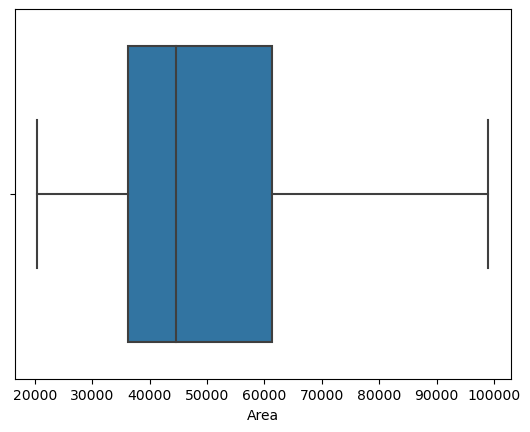

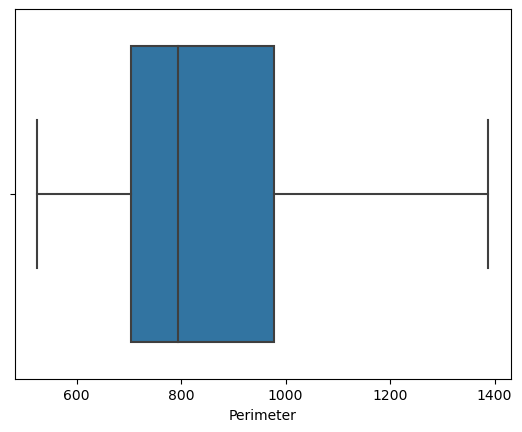

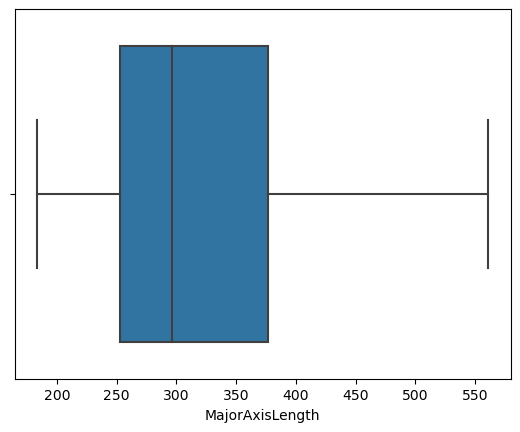

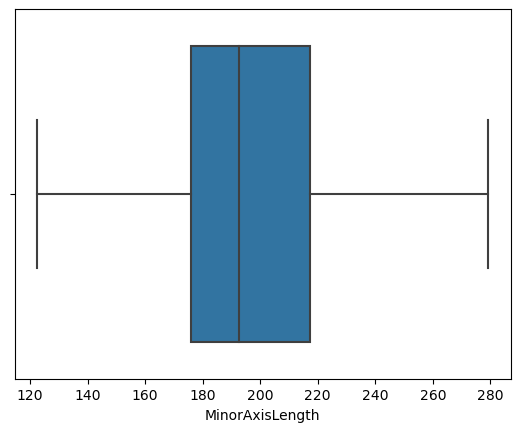

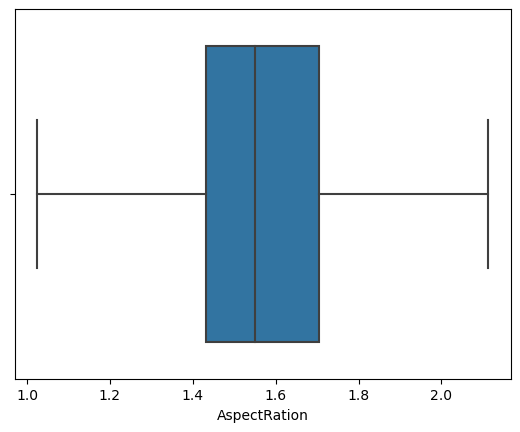

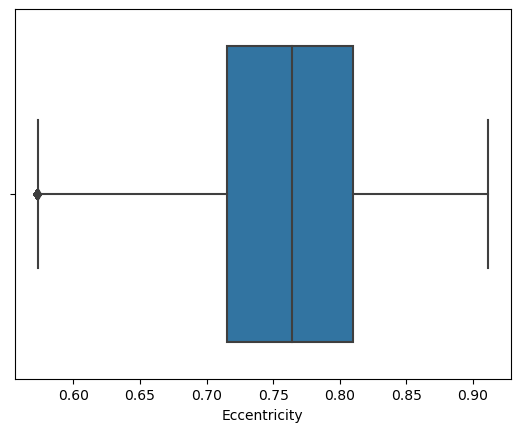

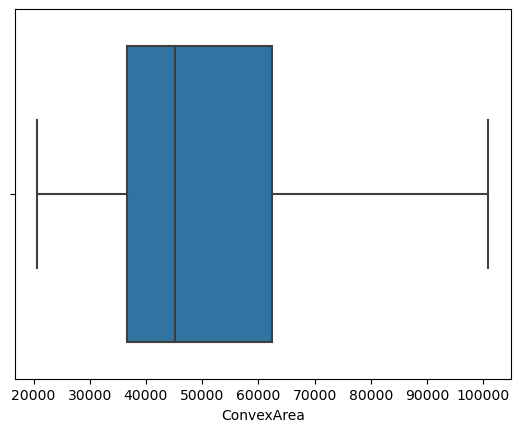

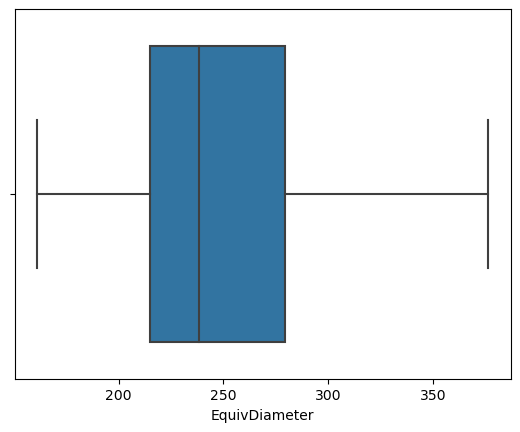

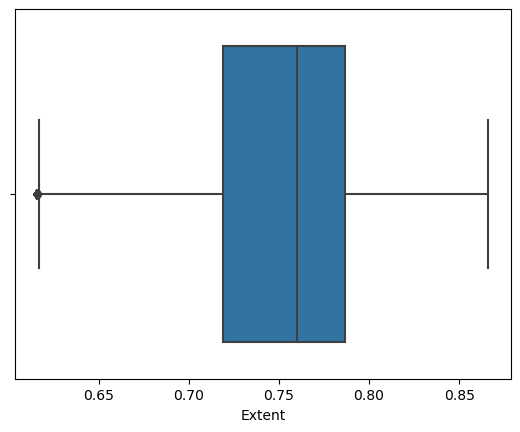

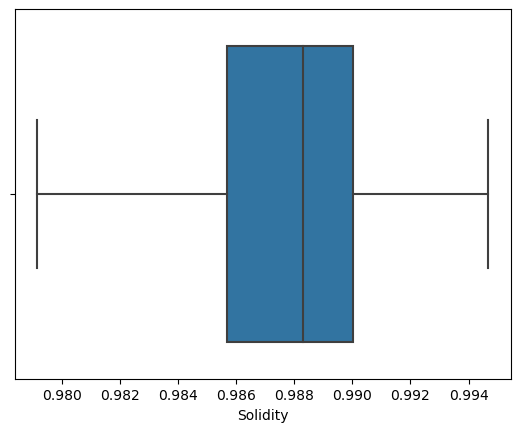

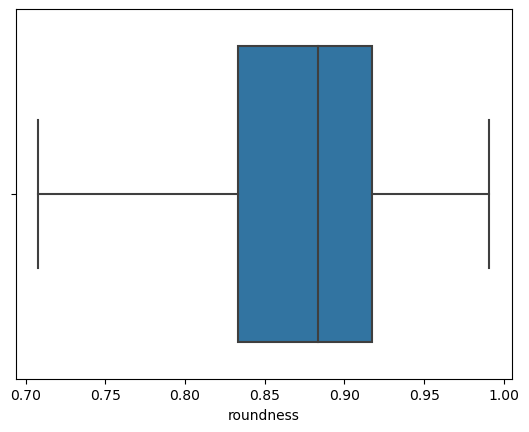

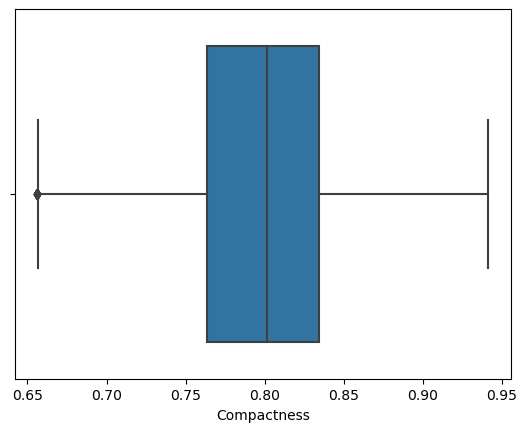

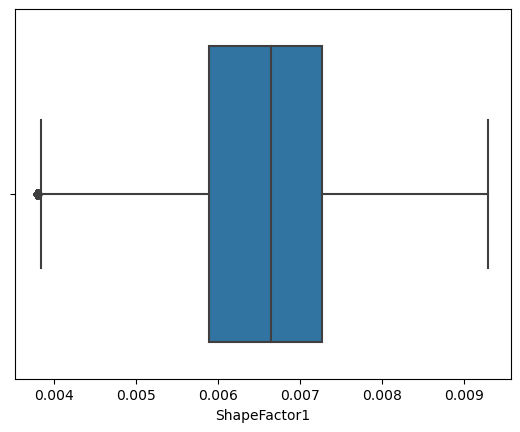

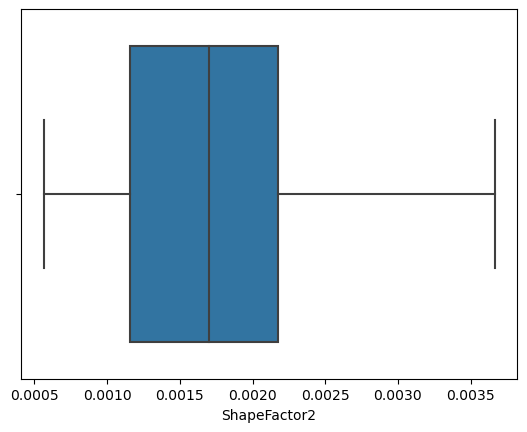

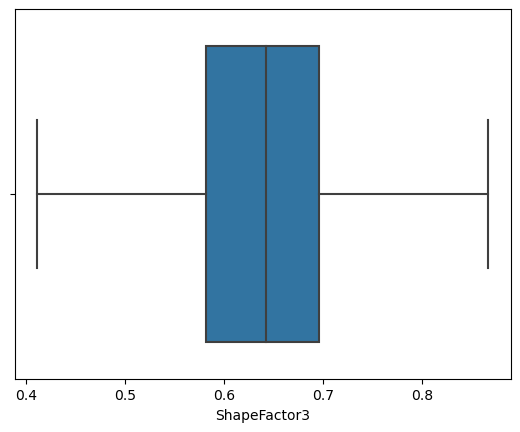

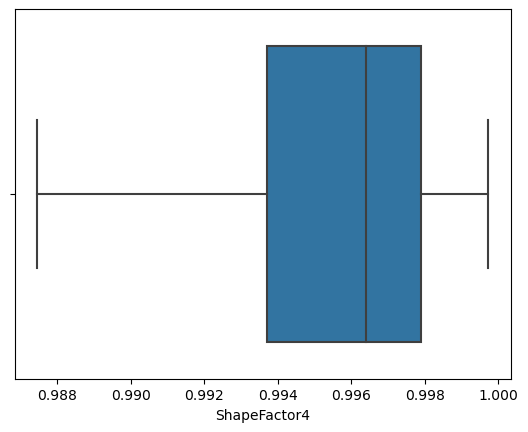

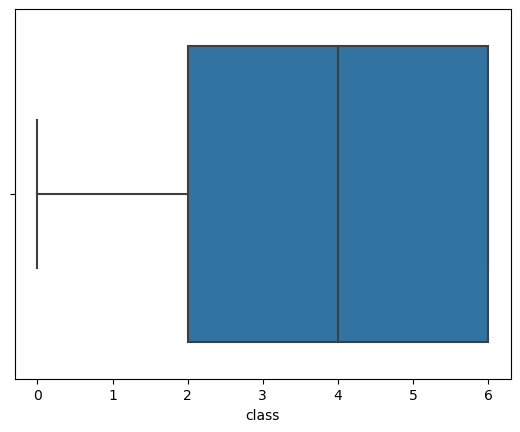

In [24]:
for i in Data.columns:
    sns.boxplot(Data[i])
    plt.show()

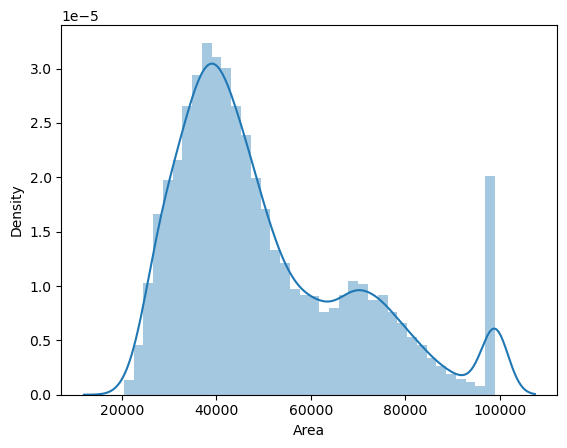

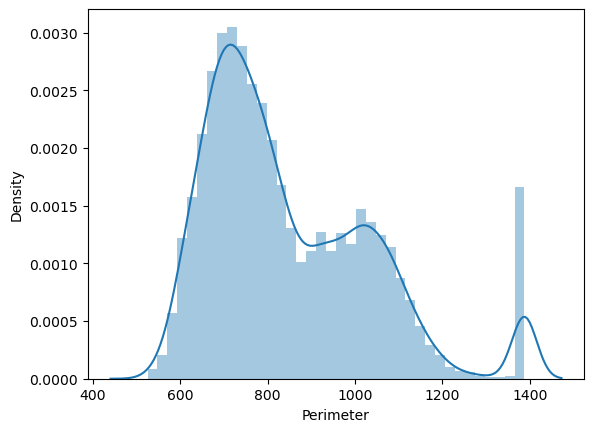

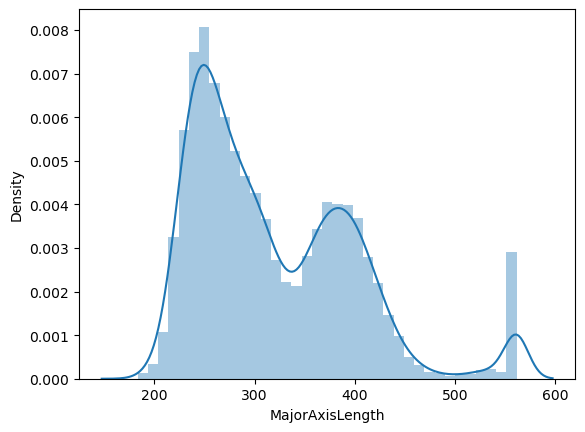

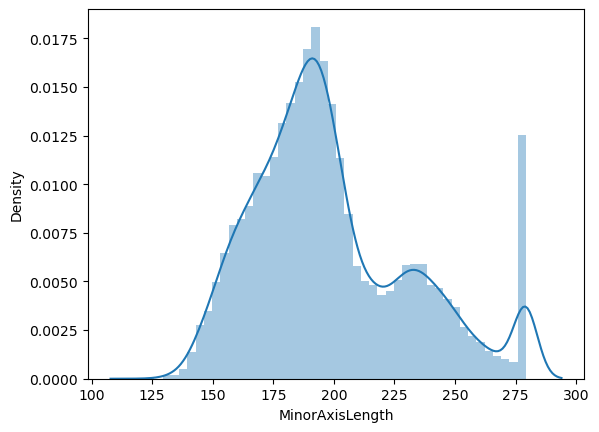

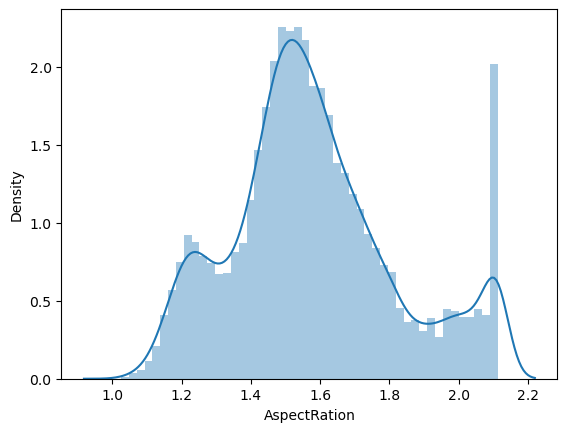

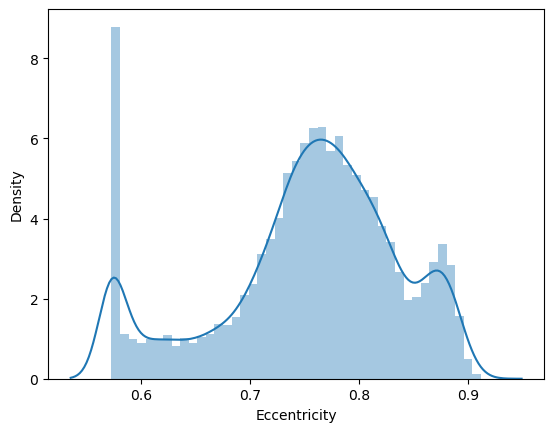

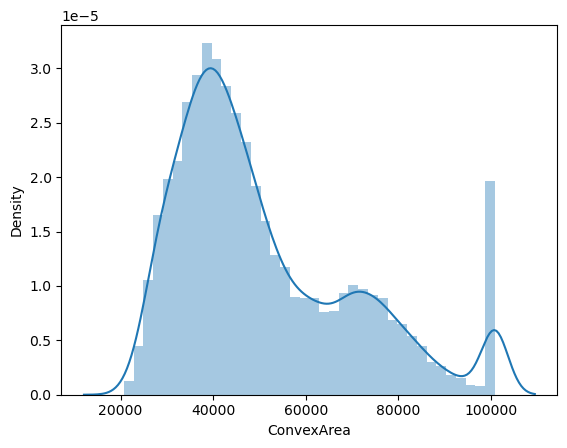

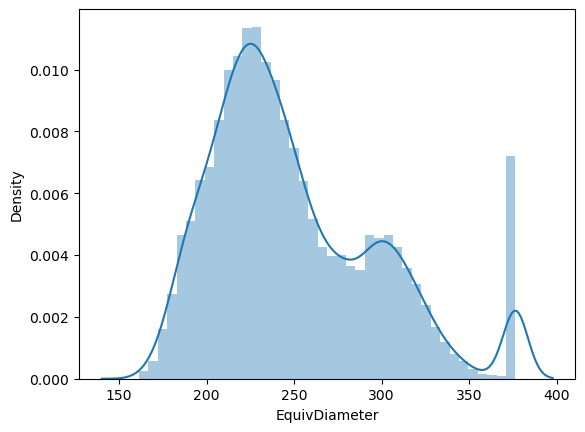

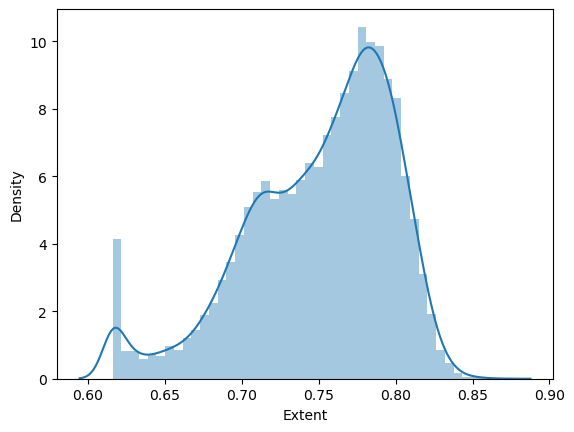

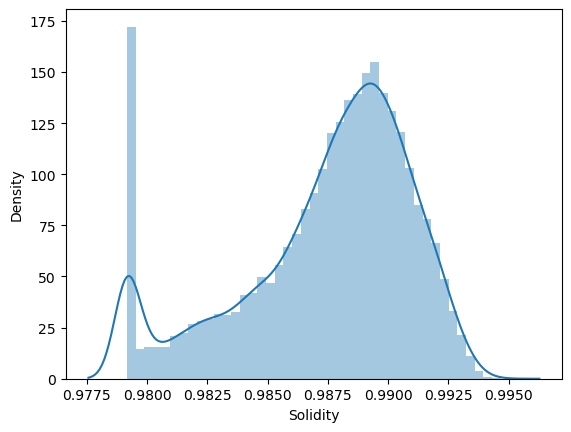

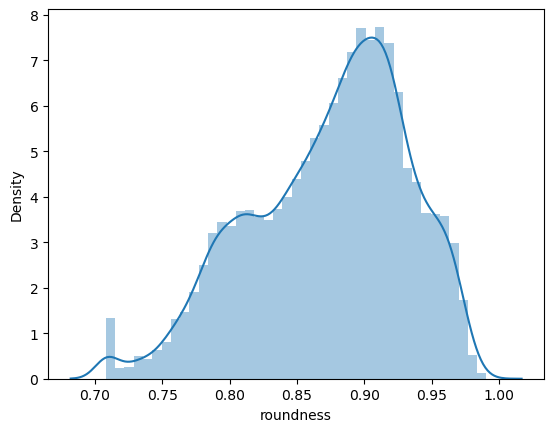

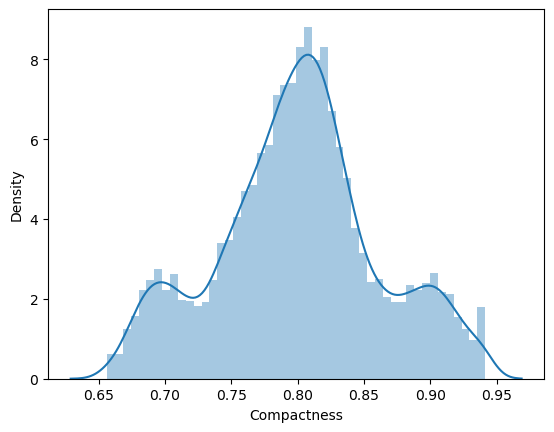

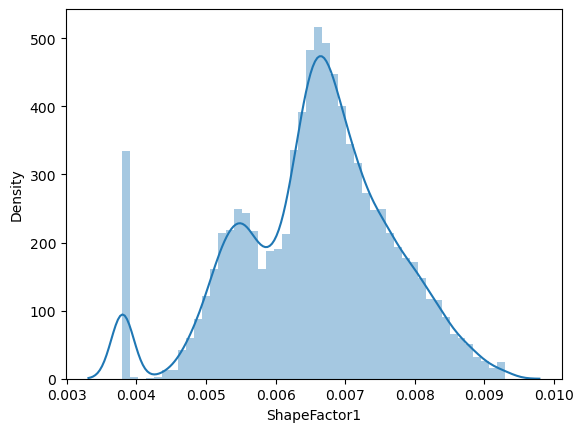

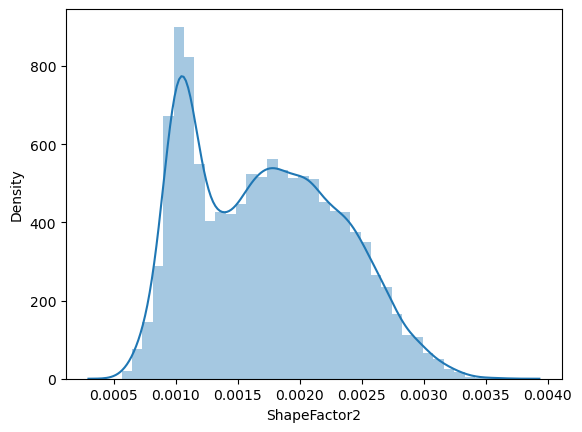

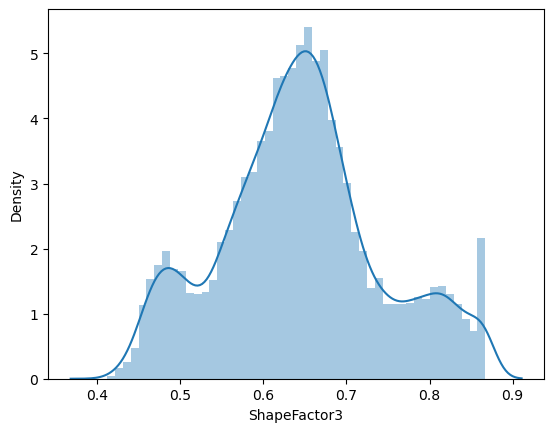

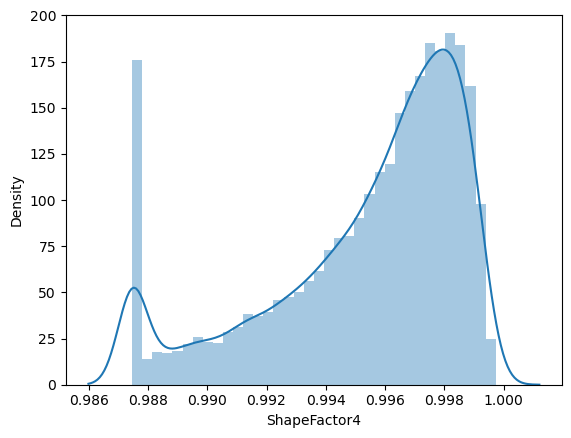

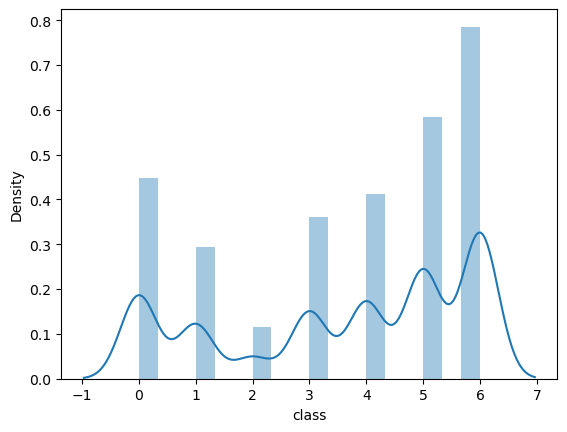

In [25]:
#Distribution to check skewness
for i in Data.columns:
    sns.distplot(Data[i])
    plt.show()

In [26]:
Data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.573000,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734.0,638.018,200.524796,182.734419,1.097356,0.573000,29172.0,191.272750,0.783968,0.984986,0.887034,0.941300,0.006979,0.003564,0.867076,0.998430,0
2,29380.0,624.110,212.826130,175.931143,1.209713,0.573000,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008.0,645.884,210.557999,182.516516,1.153638,0.573000,30724.0,195.467062,0.782681,0.979168,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140.0,620.134,201.847882,190.279279,1.060798,0.573000,30417.0,195.896503,0.773098,0.990893,0.984877,0.941300,0.006697,0.003665,0.867076,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


In [27]:
#Seperating Dependent variable from independent variable
X = Data['class']
X

0        0
1        0
2        0
3        0
4        0
        ..
13606    6
13607    6
13608    6
13609    6
13610    6
Name: class, Length: 13543, dtype: int64

In [28]:
Y=Data.drop(['class'],axis=1)
Y

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395.0,610.291,208.178117,173.888747,1.197191,0.573000,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734.0,638.018,200.524796,182.734419,1.097356,0.573000,29172.0,191.272750,0.783968,0.984986,0.887034,0.941300,0.006979,0.003564,0.867076,0.998430
2,29380.0,624.110,212.826130,175.931143,1.209713,0.573000,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008.0,645.884,210.557999,182.516516,1.153638,0.573000,30724.0,195.467062,0.782681,0.979168,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140.0,620.134,201.847882,190.279279,1.060798,0.573000,30417.0,195.896503,0.773098,0.990893,0.984877,0.941300,0.006697,0.003665,0.867076,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [29]:
X.shape,Y.shape

((13543,), (13543, 16))

In [30]:
#smoten method
from collections import Counter

In [31]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.over_sampling import SMOTEN
Smoten = SMOTEN()
Xr,Yr = Smoten.fit_resample(Y,X)

In [33]:
Xr.shape,Yr.shape

((24822, 16), (24822,))

In [34]:
print('Actual {}'.format(Counter(X)))
print('Resample {}'.format(Counter(Yr)))

Actual Counter({6: 3546, 5: 2636, 0: 2027, 4: 1860, 3: 1630, 1: 1322, 2: 522})
Resample Counter({0: 3546, 1: 3546, 2: 3546, 3: 3546, 4: 3546, 5: 3546, 6: 3546})


In [35]:
Yr.value_counts()

0    3546
1    3546
2    3546
3    3546
4    3546
5    3546
6    3546
Name: class, dtype: int64

In [36]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [37]:
std = StandardScaler()

In [38]:
X1 = std.fit_transform(Xr)
X1

array([[-1.33299311, -1.37067642, -1.40214464, ...,  2.6382453 ,
         2.1195832 ,  1.32821325],
       [-1.31795186, -1.25253313, -1.47622793, ...,  3.2854761 ,
         2.42950034,  1.25275095],
       [-1.28928917, -1.31179439, -1.3571524 , ...,  2.48347631,
         2.04079749,  1.41619208],
       ...,
       [-0.75627859, -0.69440869, -0.61552304, ...,  0.14989106,
        -0.14816286, -0.33336317],
       [-0.67938627, -0.630111  , -0.61026483, ..., -0.18796024,
        -0.36975238, -0.01748127],
       [-0.54907311, -0.59327937, -0.6204543 , ...,  0.13717949,
        -0.00964817, -0.16672165]])

In [39]:
#Spliting Data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Yr,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((19857, 16), (4965, 16), (19857,), (4965,))

In [40]:
#Model Building:-
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred=lg.predict(x_test)
y_pred

array([2, 6, 5, ..., 6, 5, 1], dtype=int64)

In [42]:
lg.score(x_test,y_test)

0.9554884189325277

In [43]:
lg.score(x_train,y_train)

0.959057259404744

In [44]:
LR=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
LR

,Actual,Predicted
18211,2,2
12715,6,6
8494,5,5
20174,2,2
8077,5,5
...,...,...
9663,5,5
2669,1,1
10834,6,6
24694,5,5


In [45]:
#Confusion Matrix
from sklearn.metrics import classification_report,roc_curve,confusion_matrix,accuracy_score,auc,roc_auc_score

In [46]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[723,   5,   0,   0,   0,  10,   0],
       [  3, 681,   0,  10,   1,  11,   0],
       [  0,   0, 691,   0,   0,   0,   0],
       [  1,  10,   1, 704,   4,   1,   0],
       [  0,   0,   0,   5, 675,   4,   2],
       [ 14,   1,   0,   1,  11, 626,  45],
       [ 14,   0,   0,   0,   4,  63, 644]], dtype=int64)

In [47]:
class_rep=classification_report(y_test,y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       738
           1       0.98      0.96      0.97       706
           2       1.00      1.00      1.00       691
           3       0.98      0.98      0.98       721
           4       0.97      0.98      0.98       686
           5       0.88      0.90      0.89       698
           6       0.93      0.89      0.91       725

    accuracy                           0.96      4965
   macro avg       0.96      0.96      0.96      4965
weighted avg       0.96      0.96      0.96      4965



In [48]:
#No. of Wrong Predictions
len(LR.loc[LR['Actual']!=LR['Predicted']])

221

In [49]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pre_DT=DT.predict(x_test)

In [51]:
y_pre_DT

array([2, 6, 5, ..., 6, 5, 1], dtype=int64)

In [52]:
DT.score(x_test,y_test)

0.9389728096676737

In [53]:
DT.score(x_train,y_train)

1.0

Decision Tree method is overfited

In [54]:
#Grid Search Cv
grid_pram = {'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_depth':range(2,5,1),
            'min_samples_split':range(2,5,1),
            'min_samples_leaf':range(1,5,1),
            'ccp_alpha':np.random.rand(20)} 

In [55]:
from sklearn.model_selection import GridSearchCV
Grid_cv=GridSearchCV(estimator=DT, param_grid=grid_pram,n_jobs=1,cv=10)
Grid_cv.fit(x_train,y_train)
Grid_cv.best_params_

{'ccp_alpha': 0.15521795440966313,
 'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [56]:
DT1=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=4,min_samples_split=2,min_samples_leaf=1,ccp_alpha=0.05615801413737709)
DT1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05615801413737709, criterion='entropy',
                       max_depth=4)

In [57]:
y_pre_DT1=DT1.predict(x_test)
y_pre_DT1

array([2, 6, 5, ..., 6, 5, 3], dtype=int64)

In [58]:
DT1.score(x_test,y_test)

0.9123867069486404

In [59]:
DT1.score(x_train,y_train)

0.9141360729213879

overfitting problem was solved, Training and testing accuracy is approximatly same

In [60]:
#Performance Matrix
confusion_M2=confusion_matrix(y_test,y_pre_DT1)
confusion_M2

array([[710,   4,   0,   1,   0,  19,   4],
       [ 16, 540,   0, 110,   1,  39,   0],
       [  0,   0, 691,   0,   0,   0,   0],
       [  1,  12,   2, 697,   3,   6,   0],
       [  0,   0,   0,   7, 667,  10,   2],
       [ 10,   0,   0,   0,   7, 596,  85],
       [ 36,   0,   0,   0,   2,  58, 629]], dtype=int64)

In [61]:
cal_R2=classification_report(y_test,y_pre_DT1)
print(cal_R2)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       738
           1       0.97      0.76      0.86       706
           2       1.00      1.00      1.00       691
           3       0.86      0.97      0.91       721
           4       0.98      0.97      0.98       686
           5       0.82      0.85      0.84       698
           6       0.87      0.87      0.87       725

    accuracy                           0.91      4965
   macro avg       0.92      0.91      0.91      4965
weighted avg       0.92      0.91      0.91      4965



In [62]:
DT_GCV=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_DT1})
DT_GCV

,Actual,Predicted
18211,2,2
12715,6,6
8494,5,5
20174,2,2
8077,5,5
...,...,...
9663,5,5
2669,1,1
10834,6,6
24694,5,5


In [63]:
#No of wrong predictions
len(DT_GCV.loc[DT_GCV['Actual']!=DT_GCV['Predicted']])

435

In [64]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier( random_state=0)
Rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [65]:
y_pre_Rf=Rf.predict(x_test)

In [66]:
Rf.score(x_test,y_test)

0.954884189325277

In [67]:
Rf.score(x_train,y_train)

0.999949639925467

In [68]:
# Performance matrix
confusion_M3=confusion_matrix(y_test,y_pre_Rf)
confusion_M3

array([[721,   4,   0,   0,   0,   9,   4],
       [  2, 673,   0,  18,   3,  10,   0],
       [  0,   0, 691,   0,   0,   0,   0],
       [  1,  15,   0, 698,   4,   3,   0],
       [  0,   2,   0,   4, 671,   7,   2],
       [ 12,   1,   0,   1,   7, 629,  48],
       [ 12,   0,   0,   0,   3,  52, 658]], dtype=int64)

In [69]:
Report_2 = classification_report(y_test,y_pre_Rf)
print(Report_2)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       738
           1       0.97      0.95      0.96       706
           2       1.00      1.00      1.00       691
           3       0.97      0.97      0.97       721
           4       0.98      0.98      0.98       686
           5       0.89      0.90      0.89       698
           6       0.92      0.91      0.92       725

    accuracy                           0.95      4965
   macro avg       0.96      0.96      0.96      4965
weighted avg       0.95      0.95      0.95      4965



In [70]:
Rf_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_Rf})
Rf_df

,Actual,Predicted
18211,2,2
12715,6,6
8494,5,5
20174,2,2
8077,5,5
...,...,...
9663,5,5
2669,1,1
10834,6,6
24694,5,5


In [71]:
#No of wrong predictions
len(Rf_df.loc[Rf_df['Actual']!=Rf_df['Predicted']])

224